In [2]:
# prompt: leer el archi csv

#from google.colab import drive
import pandas as pd
#drive.mount('/content/drive')


file_path = "C:/Users/Userr/Desktop/NoCountry/c19-124-n-data-bi/data/Data2.csv"

df = pd.read_csv(file_path)


In [3]:
df.head(5)

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Time,LimiteCredito,...,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid),Dia_Semana_Domingo,Dia_Semana_Jueves,Dia_Semana_Lunes,Dia_Semana_Martes,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes
0,11473,0,35563,72510,44317,727,1991,1,0.905811,33900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,13029,0,35563,72510,44317,727,1991,1,-0.445224,33900,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5500,0,35563,72510,44317,727,1991,2,-1.142108,33900,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1167,0,35563,72510,44317,727,1991,2,-0.326885,33900,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,995,0,35563,72510,44317,727,1991,3,1.014288,33900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [5]:
# Cargar datos
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']


In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
# Aplicar SMOTE para sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [18]:
#Entrenamiento del modelo 

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB(priors =[0.9 ,0.1])
nb_model.fit(X_train_sm, y_train_sm)
y_pred = nb_model.predict(X_test)


In [19]:
# Predecir en el conjunto de prueba
y_pred = nb_model.predict(X_test)

In [20]:
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558576  10205]
 [   615    105]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    568781
           1       0.01      0.15      0.02       720

    accuracy                           0.98    569501
   macro avg       0.50      0.56      0.50    569501
weighted avg       1.00      0.98      0.99    569501



In [28]:
# Identificando el procentual de error
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn import metrics

error = mean_squared_error(y_test, y_pred)
print("Error porcentual : %f" % (error*100))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1]))

Error porcentual : 1.899909
Exactitud: 0.9810009113241241
AUC-ROC: 0.6445758560852067


In [16]:
#poner a prueba el modelo 


DatosPrueba = pd.read_csv("C:/Users/Userr/Desktop/NoCountry/c19-124-n-data-bi/data/DatosVerificacion.csv")

In [22]:
XPrueba = DatosPrueba.drop('Is_Fraud', axis=1)
yPrueba = DatosPrueba['Is_Fraud']


In [23]:
Prediccion = nb_model.predict(XPrueba)

In [24]:
#El conjunto de datos para prueba tiene 10 transacciones, 5 fraudulentas y 5 que no lo son, DatosPrueba =[1,1,1,1,1,0,0,0,0,,0]
Prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

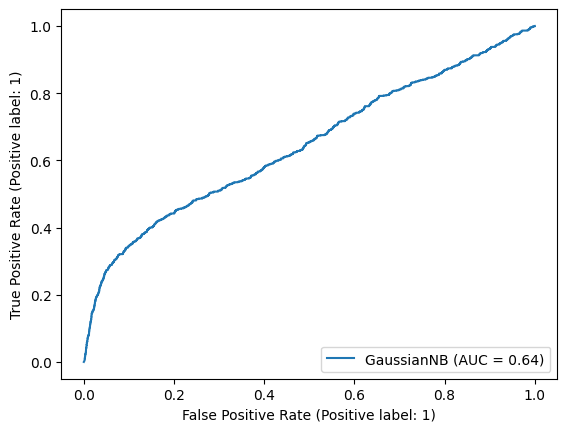

In [26]:
# graficamente como clasisfica el modelo

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(nb_model, X_test, y_test)
plt.show()
